# Задание 1

Напишите регулярное выражение для определения корректности автомобильного номера. Шаблон автомобильного номера: буква + три цифры + две буквы + две цифры. Используются 12 букв:  А, В, Е, К, М, Н, О, Р, С, Т, У и Х.


$\text{[АВЕКМНОРСТУХ]\d{3}[АВЕКМНОРСТУХ]{2}\d{2}}$

Можно еще добавить проверку на регион, но чет будет выглядеть совсем противно

# Задание 2
Установите библиотеку NLTK. Скачайте корпус проекта Гутенберг: 
1. Постройте по любой книге кривую Ципфа (см. https://ru.wikipedia.org/wiki/Закон_Ципфа) и опишите, что показывает график
2. Найдите топ-10 слов по частоте в выбранной книге
3. Найдите топ-10 слов по частоте в выбранной книге без стоп-слов
4. Посчитайте общее количество слов и количество уникальных слов в книге


In [14]:
import nltk
import numpy as np
from nltk.corpus import gutenberg

gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Руками чистить текст от всяких левых символов совсем чет не хочется, поэтому используем CountVectorizer, он и к регистру приводит, и мусор удаляет

In [158]:
from sklearn.feature_extraction.text  import CountVectorizer

words = gutenberg.words('bible-kjv.txt')
print(np.sort(np.unique(words)))
cv = CountVectorizer().fit(words)
count = cv.transform(words)
summ = count.sum(axis=0).reshape(-1, 1)

n_words = summ.sum()
n_unique = count.shape[1]

count_dict = {k : v[0, 0] for k, v in zip(cv.get_feature_names(), summ)}
count_dict = {k : v for k, v in sorted(count_dict.items(), key=lambda item: -item[1])}

['!' '!)' "'" ... 'zeal' 'zealous' 'zealously']


Нарисуем еще долю самых частых 10 слов относительно первого, а то по общей картине не все понятно

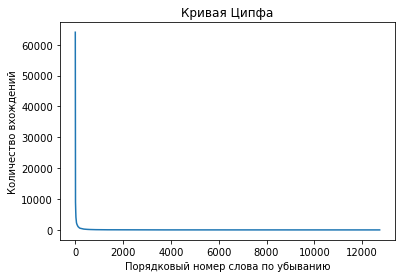

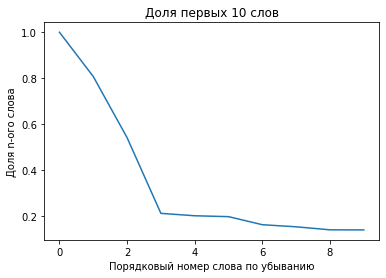

In [159]:
import matplotlib.pyplot as plt

sorted_val = np.sort(summ, axis=0)[::-1]

plt.title('Кривая Ципфа')
plt.plot(np.arange(len(count_dict)), sorted_val)
plt.xlabel('Порядковый номер слова по убыванию')
plt.ylabel('Количество вхождений')
plt.show()

plt.title('Доля первых 10 слов')
plt.plot(np.arange(10), (sorted_val / sorted_val[0])[:10])
plt.xlabel('Порядковый номер слова по убыванию')
plt.ylabel('Доля n-ого слова')
plt.show()

In [160]:
for i, v in enumerate(list(count_dict.values())[:10]):
    print('Отношение частоты:', str(np.round(v / list(count_dict.values())[0], 3)) + '; 1/n:', np.round(1 / (i + 1), 3))

Отношение частоты: 1.0; 1/n: 1.0
Отношение частоты: 0.807; 1/n: 0.5
Отношение частоты: 0.542; 1/n: 0.333
Отношение частоты: 0.212; 1/n: 0.25
Отношение частоты: 0.202; 1/n: 0.2
Отношение частоты: 0.198; 1/n: 0.167
Отношение частоты: 0.163; 1/n: 0.143
Отношение частоты: 0.154; 1/n: 0.125
Отношение частоты: 0.141; 1/n: 0.111
Отношение частоты: 0.14; 1/n: 0.1


Ну можно заметить, что в целом закон Ципфа выполняется, частота слов действительно убывает пропорционально их порядковому номеру.

In [161]:
print('10 самых популярных слов: ')
print(list(count_dict.keys())[:10])

10 самых популярных слов: 
['the', 'and', 'of', 'to', 'that', 'in', 'he', 'shall', 'unto', 'for']


In [162]:
cv = CountVectorizer(stop_words='english').fit(words)
count = cv.transform(words)
summ = count.sum(axis=0).reshape(-1, 1)

count_dict = {k : v[0, 0] for k, v in zip(cv.get_feature_names(), summ)}
count_dict = {k : v for k, v in sorted(count_dict.items(), key=lambda item: -item[1])}

print('10 самых популярных слов без стоп-слов: ')
print(list(count_dict.keys())[:10])

10 самых популярных слов без стоп-слов: 
['shall', 'unto', 'lord', 'thou', 'thy', 'god', 'said', 'ye', 'thee', 'man']


In [163]:
print('Всего слов: {}, уникальных: {}'.format(n_words, n_unique))

Всего слов: 812281, уникальных: 12731


Но тут мы считаем только те слова, которые CountVectorizer посчитал словами, кажется он нормальный

# Задание 3
Подчеркните термины, которые знаете в списке и дайте определение трем терминам:

$\underline{Word2vec}$, $\underline{bert}$, $\underline{glove}$, $\underline{elmo}$, $\underline{syntax \; parsing}$, $\underline{pos \; tagging}$, $\underline{dependency \; parsing}$, $\underline{word \; embedding}$, $\underline{word \; sense \; disambiguation}$, $\underline{sentiment \; classification}$, $\underline{question \; answering}$, $\underline{squad}$, named entity recognition, $\underline{machine \; translation}$

Word sense disambiguation — определение, какое именно значение слова используется, для слов с несколькими значениями

Sentiment  classification — определение эмоциональной окраски предложения/текста

Bert — модификация трансформера, в которой используется двунаправленность, а также 15% слов заменяются масками, чтобы сетка училась восстанавливать эти слова по контексту. Используется в основном для ответа на вопросы про связь двух предложений.

# Задание 4
Допустим, вы разрабатываете поисковую систему или диалоговую систему. Пользователь может написать текст на любом языке. Задача вашей системы – определить язык и ответить пользователю. Остановимся на задаче определения языка. Как бы вы ее формально сформулировали? Предложите алгоритм определения языка, какие данные вам могут понадобится, какие ресурсы?


Не знаю насколько формально, но пусть будет так. Задача определить, какому алфавиту принадлежат символы и в каком языке есть написанные слова.



Самый простой способ: возьмем все словари, которые нам доступны, и будем искать максимальное вхождение слов в предложении в этот словарь.

Можно дополнить это n-граммами, средней длиной слов, средней длиной предложений, какой-нибудь частотный анализ символов

Другой вариант, использовать ДЛ. Можно попробовать составлять эмбеддинги для вообще всех слов, чтобы у слов из одного языка были похожие эмбеддинги, и брать минимум по расстояниям до языков. Тут можно попробовать уже разбить по языковым группам, например намутить разную длину для разных групп, чтобы искать в меньшем пространстве.

Наверно можно попробовать упороться в что-то еще более НЛПшное, но я без подсказок не придумаю сейчас такое.